In [60]:
#import all required libraries and modules
import pandas as pd
from bs4 import BeautifulSoup
import requests as re
import json
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [61]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [71]:
#yfinance object for Tesla
tsla = yf.Ticker('TSLA')

#get historical data of Tesla
tsla_history = tsla.history(period='max')

#reset the index to default instead of date column
tsla_history.reset_index(inplace=True)
tsla_history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [63]:
#url for webscraping
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

#get the html content of the url link
html_content = re.get(url).text

#create beautiful object and parse the html_content
soup = BeautifulSoup(html_content, 'html5lib')

In [64]:
cols = ['Date', 'Revenue']
tsla_revenue = pd.DataFrame(columns=cols)
tsla_revenue

for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text
    df = pd.DataFrame({'Date':[date], 'Revenue':[revenue]})
    tsla_revenue = tsla_revenue._append(df, ignore_index=True)

In [72]:
#remove \$ and \, from revenue column
tsla_revenue['Revenue'] = tsla_revenue['Revenue'].str.replace('$', '')
tsla_revenue['Revenue'] = tsla_revenue['Revenue'].str.replace(',', '')

#remove rows with non entry revenue
tsla_revenue.dropna(inplace=True)

#remove rows with empty string in the revenue column
tsla_revenue = tsla_revenue[tsla_revenue['Revenue'] != '']
tsla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [73]:
#yfinance object for Ticker GME(GameStop)
gme = yf.Ticker('GME')

#get historical stock price for game stop
gme_history = gme.history(period='max')

#reset the index to default instead of date column
gme_history.reset_index(inplace=True)
gme_history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [67]:
#download income statement of Game stop from following link
gme_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

#get gme html content as text
gme_html = re.get(gme_url).text

#parse the html content in to soup object
soup = BeautifulSoup(gme_html, 'html5lib')

In [74]:
#columns of the dataframe 
cols = ['Date', 'Revenue']

#dataframe to store revenue
gme_revenue = pd.DataFrame(columns=cols)

for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text
    df = pd.DataFrame({'Date':[date], 'Revenue':[revenue]})
    gme_revenue = gme_revenue._append(df, ignore_index=True)
    
#remove dollar and comma symbol from the revenue column
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '')
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '')

#remove rows with 'NaN' in revenue column
gme_revenue.dropna(inplace=True)

#remove rows with empty string in the revenue column
gme_revenue = gme_revenue[gme_revenue['Revenue'] != '']
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


C:\Users\rajan\AppData\Local\Temp\ipykernel_8416\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\rajan\AppData\Local\Temp\ipykernel_8416\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



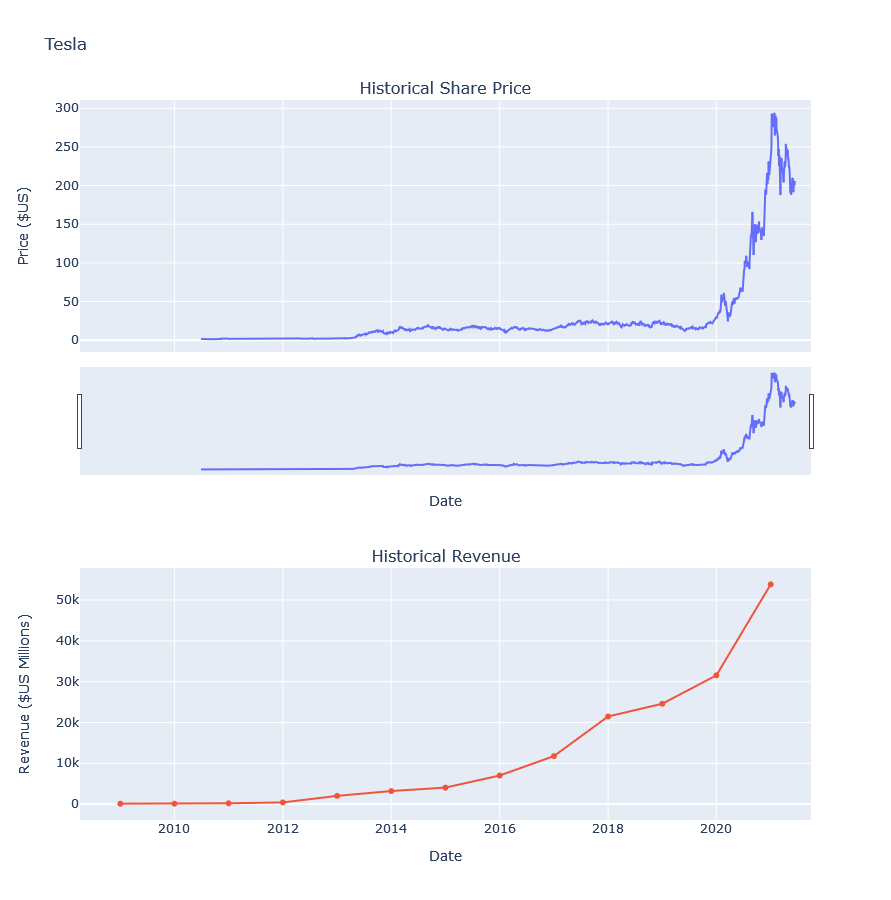

In [69]:
#plot tesla revenue
make_graph(tsla_history, tsla_revenue, 'Tesla')

C:\Users\rajan\AppData\Local\Temp\ipykernel_8416\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\rajan\AppData\Local\Temp\ipykernel_8416\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



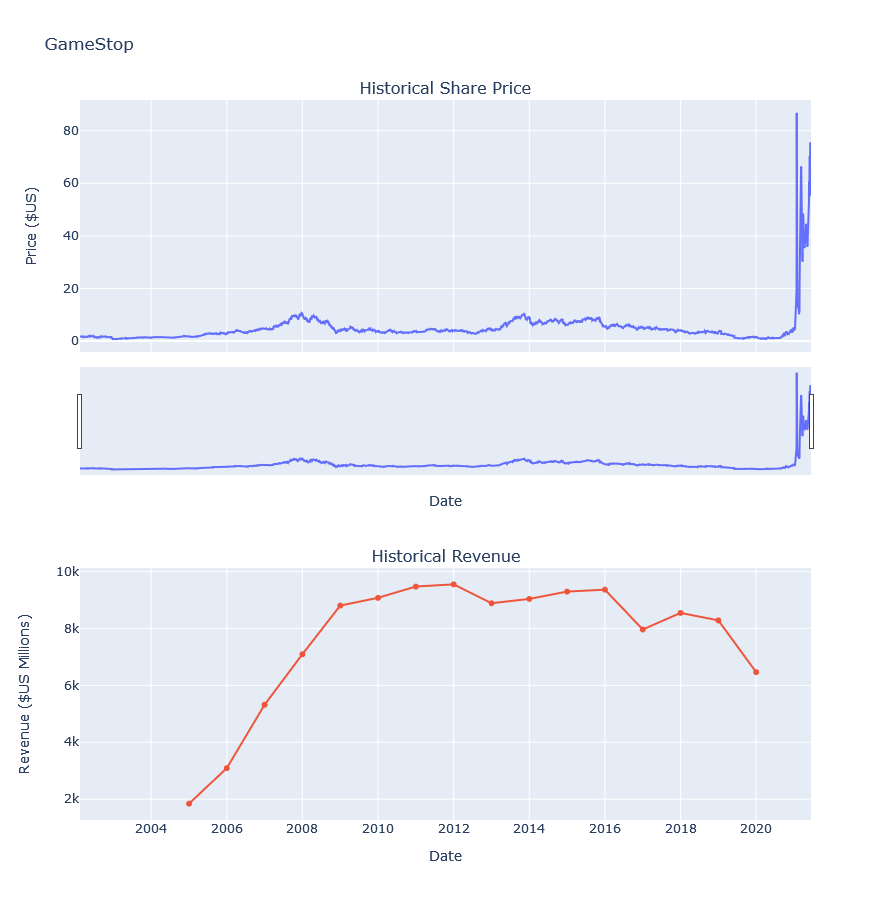

In [70]:
#plot GameStop revenue
make_graph(gme_history, gme_revenue, 'GameStop')